In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [3]:
os.listdir('./train')

['mild', 'moderate', 'NO_DR', 'Proliferate_DR', 'severe']

In [4]:
os.listdir(os.path.join('train', 'Mild'))

['0124dffecf29.png',
 '01b3aed3ed4c.png',
 '0369f3efe69b.png',
 '10_left.jpeg',
 '10_right.jpeg']

In [5]:
# Check the number of images in the dataset
train = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  for j in train_class:
    img = os.path.join('train', i, j)
    train.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(train)))


Number of train images : 25 



In [6]:
train

['train\\mild\\0124dffecf29.png',
 'train\\mild\\01b3aed3ed4c.png',
 'train\\mild\\0369f3efe69b.png',
 'train\\mild\\10_left.jpeg',
 'train\\mild\\10_right.jpeg',
 'train\\moderate\\000c1434d8d7.png',
 'train\\moderate\\00a8624548a9.png',
 'train\\moderate\\00b74780d31d.png',
 'train\\moderate\\13_left.jpeg',
 'train\\moderate\\13_right.jpeg',
 'train\\NO_DR\\002c21358ce6.png',
 'train\\NO_DR\\005b95c28852.png',
 'train\\NO_DR\\0097f532ac9f.png',
 'train\\NO_DR\\15_left.jpeg',
 'train\\NO_DR\\15_right.jpeg',
 'train\\Proliferate_DR\\001639a390f0.png',
 'train\\Proliferate_DR\\0083ee8054ee.png',
 'train\\Proliferate_DR\\0243404e8a00.png',
 'train\\Proliferate_DR\\16_left.jpeg',
 'train\\Proliferate_DR\\16_right.jpeg',
 'train\\severe\\0104b032c141.png',
 'train\\severe\\03c85870824c.png',
 'train\\severe\\042470a92154.png',
 'train\\severe\\17_left.jpeg',
 'train\\severe\\17_right.jpeg']

In [7]:
label

['mild',
 'mild',
 'mild',
 'mild',
 'mild',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'moderate',
 'NO_DR',
 'NO_DR',
 'NO_DR',
 'NO_DR',
 'NO_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'Proliferate_DR',
 'severe',
 'severe',
 'severe',
 'severe',
 'severe']

C:\Users\Siddh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

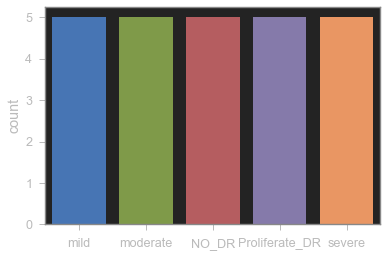

In [8]:
sns.countplot(label)

# TASK #3: PERFORM DATA EXPLORATION AND DATA VISUALIZATION

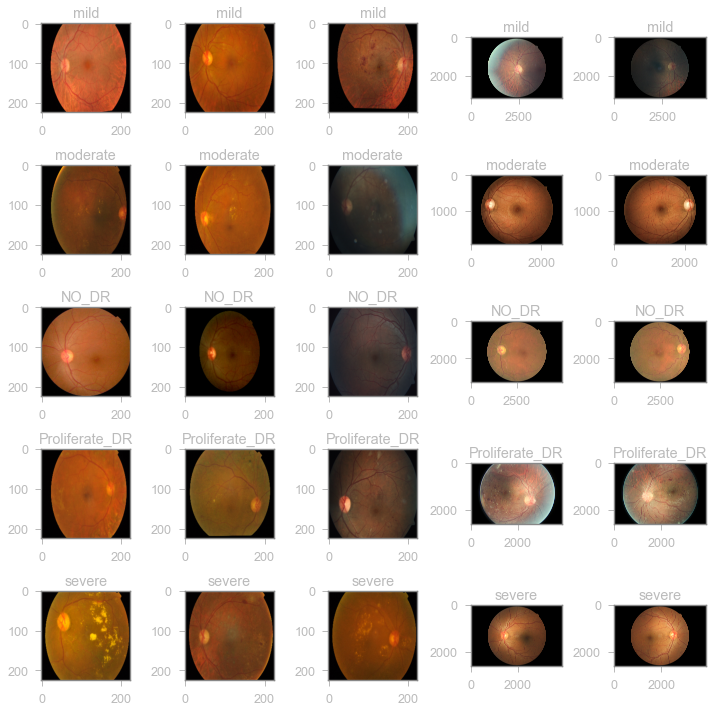

In [9]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (10, 10))
count = 0
for i in os.listdir('./train'):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('train', i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('train', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()


In [10]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))

Number of images in mild = 5 

Number of images in moderate = 5 

Number of images in NO_DR = 5 

Number of images in Proliferate_DR = 5 

Number of images in severe = 5 



In [11]:
retina_df = pd.DataFrame({'Image': train,'Labels': label})
retina_df

,Image,Labels
0,train\mild\0124dffecf29.png,mild
1,train\mild\01b3aed3ed4c.png,mild
2,train\mild\0369f3efe69b.png,mild
3,train\mild\10_left.jpeg,mild
4,train\mild\10_right.jpeg,mild
5,train\moderate\000c1434d8d7.png,moderate
6,train\moderate\00a8624548a9.png,moderate
7,train\moderate\00b74780d31d.png,moderate
8,train\moderate\13_left.jpeg,moderate
9,train\moderate\13_right.jpeg,moderate


<function matplotlib.pyplot.show(close=None, block=None)>

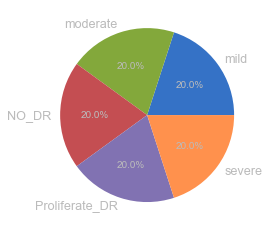

In [12]:
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%')
plt.show

# TASK #4: PERFORM DATA AUGMENTATION AND CREATE DATA GENERATOR

In [13]:
# Shuffle the data and split it into training and testing
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [14]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=3,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=3,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="Image",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=3)

Found 17 validated image filenames belonging to 5 classes.
Found 3 validated image filenames belonging to 5 classes.
Found 5 validated image filenames belonging to 3 classes.


In [16]:
tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.0,
      height_shift_range=0.0,
      brightness_range=None,
      shear_range=0.0,
      zoom_range=0.0,
      channel_shift_range=0.0,
      fill_mode="nearest",
      cval=0.0,
      horizontal_flip=False,
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.3,
      dtype=None)

# TASK #6: BUILD RES-BLOCK BASED DEEP LEARNING MODEL

In [17]:
def res_block(X, filter, stage):
  
  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [18]:

input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

# X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 128, 128, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

 res_2_identity_2_b (Conv2D)    (None, 31, 31, 64)   36928       ['activation_7[0][0]']           
                                                                                                  
 bn_2_identity_2_b (BatchNormal  (None, 31, 31, 64)  256         ['res_2_identity_2_b[0][0]']     
 ization)                                                                                         
                                                                                                  
 activation_8 (Activation)      (None, 31, 31, 64)   0           ['bn_2_identity_2_b[0][0]']      
                                                                                                  
 res_2_identity_2_c (Conv2D)    (None, 31, 31, 256)  16640       ['activation_8[0][0]']           
                                                                                                  
 bn_2_identity_2_c (BatchNormal  (None, 31, 31, 256)  1024       ['res_2_identity_2_c[0][0]']     
 ization) 

 bn_3_identity_2_b (BatchNormal  (None, 15, 15, 128)  512        ['res_3_identity_2_b[0][0]']     
 ization)                                                                                         
                                                                                                  
 activation_17 (Activation)     (None, 15, 15, 128)  0           ['bn_3_identity_2_b[0][0]']      
                                                                                                  
 res_3_identity_2_c (Conv2D)    (None, 15, 15, 512)  66048       ['activation_17[0][0]']          
                                                                                                  
 bn_3_identity_2_c (BatchNormal  (None, 15, 15, 512)  2048       ['res_3_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_5 (Ad

 ization)                                                                                         
                                                                                                  
 activation_26 (Activation)     (None, 7, 7, 256)    0           ['bn_4_identity_2_b[0][0]']      
                                                                                                  
 res_4_identity_2_c (Conv2D)    (None, 7, 7, 1024)   263168      ['activation_26[0][0]']          
                                                                                                  
 bn_4_identity_2_c (BatchNormal  (None, 7, 7, 1024)  4096        ['res_4_identity_2_c[0][0]']     
 ization)                                                                                         
                                                                                                  
 add_8 (Add)                    (None, 7, 7, 1024)   0           ['bn_4_identity_2_c[0][0]',      
          

# TASK #7: COMPILE AND TRAIN DEEP LEARNING MODEL

In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])


In [20]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // 3,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // 3,
    epochs =10)

Epoch 1/10
5/5 [==============================] - 20s 2s/step - loss: 13.1293 - accuracy: 0.3571 - val_loss: 1.6631 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 6s 1s/step - loss: 13.3052 - accuracy: 0.2857 - val_loss: 1.6058 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 6s 1s/step - loss: 3.0305 - accuracy: 0.3571 - val_loss: 1.9832 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 6s 1s/step - loss: 5.3674 - accuracy: 0.4286 - val_loss: 2.2712 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 6s 1s/step - loss: 2.9246 - accuracy: 0.6000 - val_loss: 2.1757 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 6s 1s/step - loss: 3.9470 - accuracy: 0.4286 - val_loss: 2.2006 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 6s 1s/step - loss: 2.9612 - accuracy: 0.6667 - val_loss: 2.2826 - val_accuracy: 0.0000e+00
Epoch 8/10
5/5 [==

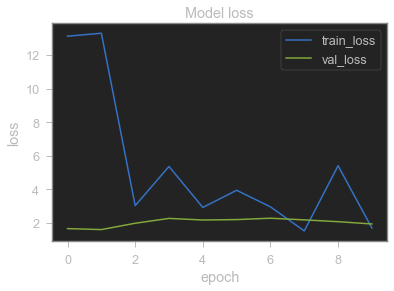

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()


In [23]:
model.load_weights("retina_weights.hdf5")

In [25]:
# Assigning label names to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [26]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])


In [27]:
# Getting the test accuracy 
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.0


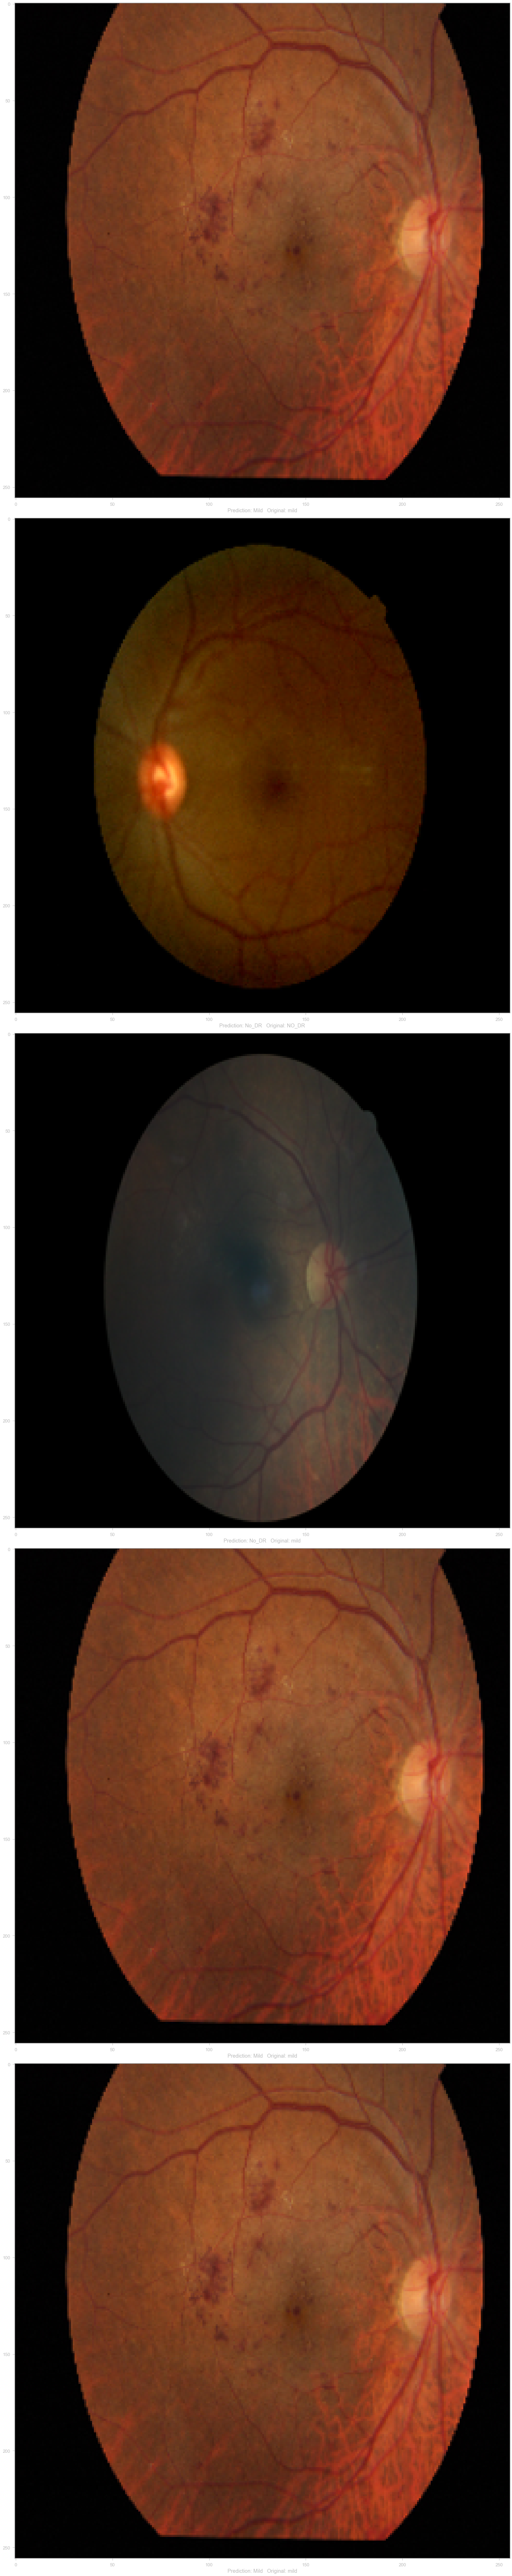

In [28]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(5):
    j = random.randint(0,len(image))
    fig.add_subplot(5,1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

C:\Users\Siddh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

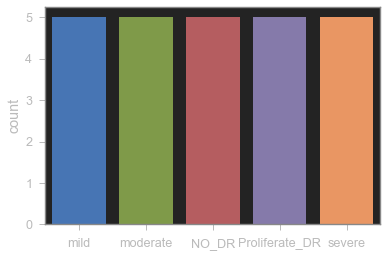

In [29]:
sns.countplot(label)

MINI CHALLENGE #2 SOLUTION: 
- Plot a pie chart showing the percentage of samples per class. 

<function matplotlib.pyplot.show(close=None, block=None)>

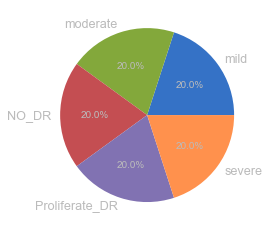

In [30]:
No_images_per_class
Class_name
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%')
plt.show

In [31]:
tf.keras.preprocessing.image.ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.0,
      height_shift_range=0.0,
      brightness_range=None,
      shear_range=0.0,
      zoom_range=0.0,
      channel_shift_range=0.0,
      fill_mode="nearest",
      cval=0.0,
      horizontal_flip=False,
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.3,
      dtype=None)

In [32]:
# Print out the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))


              precision    recall  f1-score   support

        Mild       0.00      0.00      0.00       0.0
       NO_DR       0.00      0.00      0.00       2.0
       No_DR       0.00      0.00      0.00       0.0
        mild       0.00      0.00      0.00       2.0
      severe       0.00      0.00      0.00       1.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



C:\Users\Siddh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Siddh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Siddh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

Text(0.5, 1.0, 'Confusion_matrix')

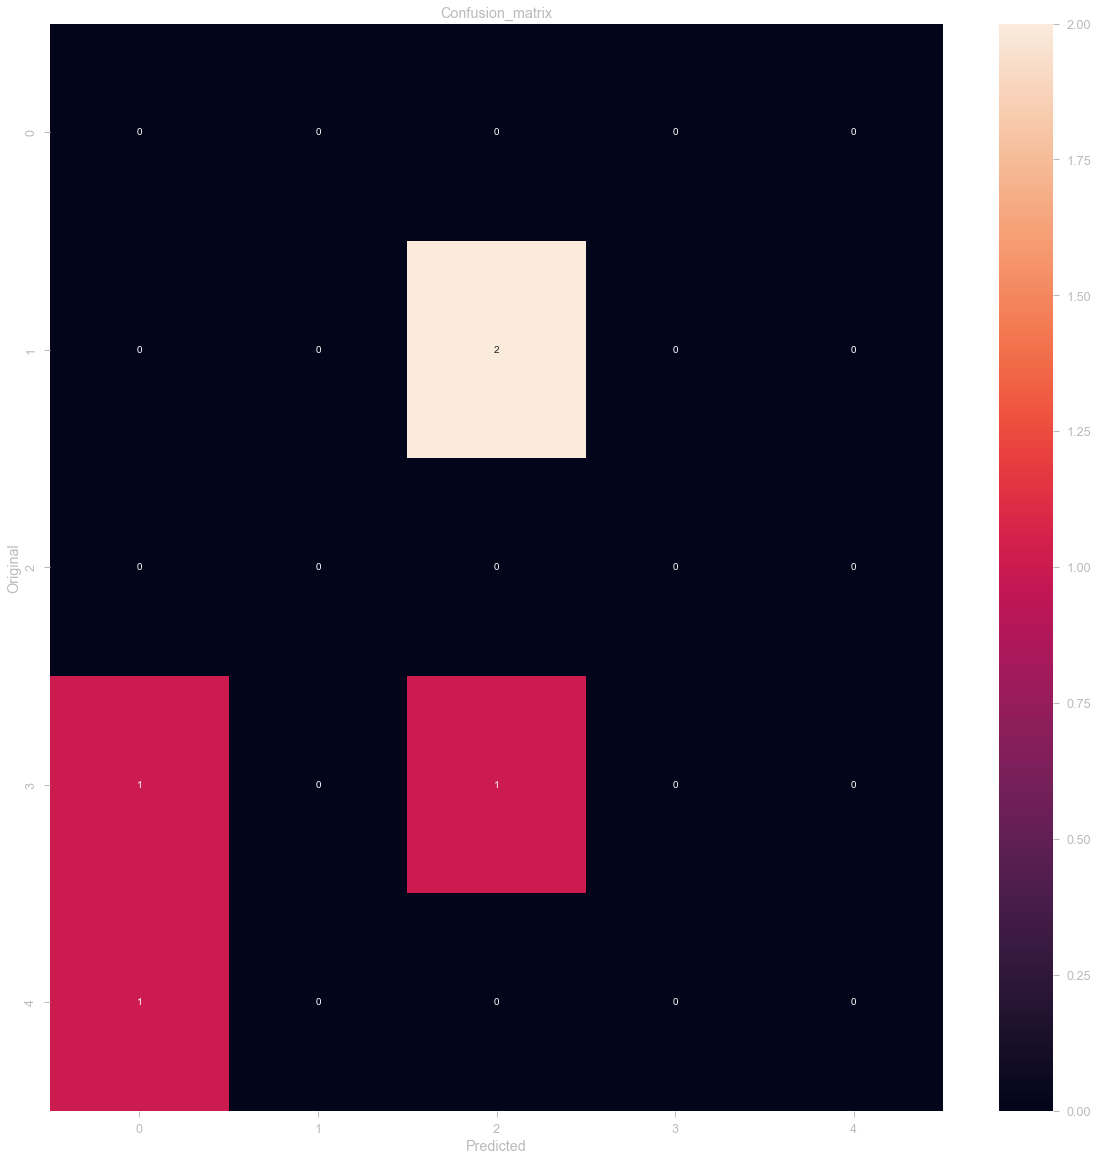

In [33]:

# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')
